In [3]:
import 	struct
import 	math
import 	torch
import 	numpy 				as np
import 	matplotlib.pyplot 	as plt
from 	tqdm 				import tqdm
from 	array 				import array
from 	os.path  			import join

In [4]:
# MNIST Data Loader Class
class MnistDataloader(object):
	def __init__(self, training_images_filepath,training_labels_filepath, test_images_filepath, test_labels_filepath):
		self.training_images_filepath = training_images_filepath
		self.training_labels_filepath = training_labels_filepath
		self.test_images_filepath = test_images_filepath
		self.test_labels_filepath = test_labels_filepath
		
	def read_images_labels(self, images_filepath, labels_filepath):		
		labels = []
		with open(labels_filepath, 'rb') as file:
			magic, size = struct.unpack(">II", file.read(8))
			if magic != 2049:
				raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
			labels = array("B", file.read())		
		
		with open(images_filepath, 'rb') as file:
			magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
			if magic != 2051:
				raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
			image_data = array("B", file.read())		
		images = []
		for i in range(size):
			images.append([0] * rows * cols)
		for i in range(size):
			img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
			img = img.reshape(28, 28)
			images[i][:] = img
		
		return images, labels
		
	def load_data(self):
		x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
		x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
		return (x_train, y_train),(x_test, y_test)

# Set file paths based on added MNIST Datasets
input_path 					= './archive'
training_images_filepath 	= join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath 	= join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath		= join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath		= join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Data Exploration

In [5]:
print('x_train preview:')
x_train

x_train preview:


[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
         253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,  49, 23

In [6]:
print('x_train type: ', type(x_train))

x_train type:  <class 'list'>


In [7]:
len(x_train)

60000

In [8]:
print('x_train[0] preview:')
x_train[0]

x_train[0] preview:


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253,

In [9]:
print('x_train[0] type', type(x_train[0]))

x_train[0] type <class 'list'>


In [10]:
len(x_train[0])

28

In [11]:
print('x_train[0][0] preview:')
x_train[0][0]

x_train[0][0] preview:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [12]:
type(x_train[0][0])

numpy.ndarray

In [13]:
len(x_train[0][0])

28

In [14]:
print('y_train preview:')
y_train

y_train preview:


array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4

In [15]:
type(y_train)

array.array

In [16]:
len(y_train)

60000

Conclusions:
- x_train is a list that contains 60_000 elements, each of these elements represents an image in the train split of MNIST.
- Each image has a resolution of 28 X 28 pixels.
- Each image is represented as a list of 28 rows, each row is an array of 28 pixel values.
- y_train is an array of 60_000 integers between 0 and 9, each integer represents the class of the corresponding image in x_train.
- Exploring x_test and y_test will lead to similar conclusions, for the test split.

In [17]:
# Converting the data to Numpy arrays
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


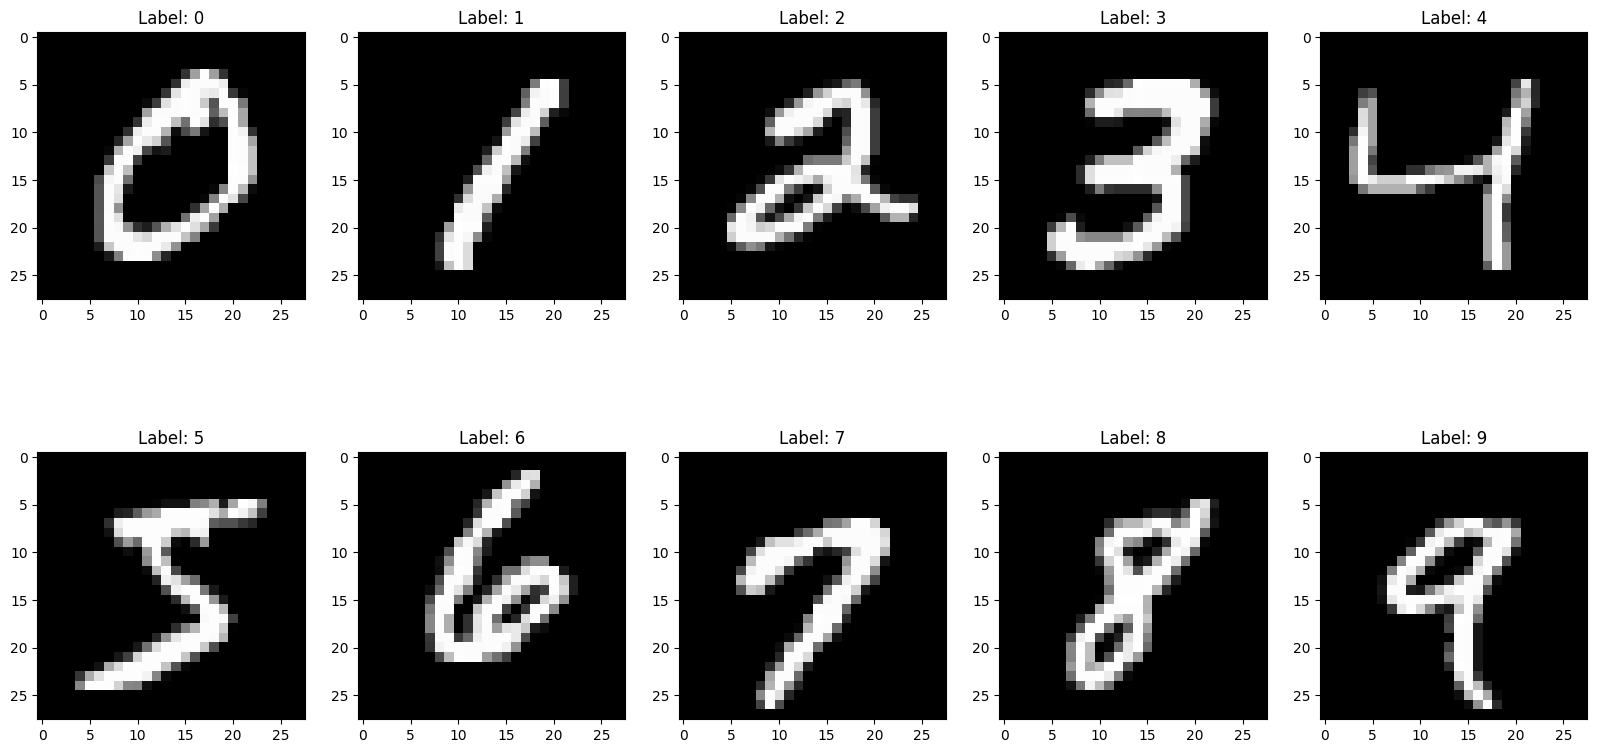

In [18]:
# Show an example of each digit
unique_digits = np.unique(y_train)
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, digit in enumerate(unique_digits):
	axs[i//5, i%5].imshow(x_train[y_train == digit][0], cmap='gray')
	axs[i//5, i%5].set_title(f'Label: {digit}')
plt.show()

# Model creation

In [19]:
# Define the model
class MNISTModel(torch.nn.Module):
	def __init__(self):
		super(MNISTModel, self).__init__()
		self.flatten = torch.nn.Flatten()
		self.linear_relu_stack = torch.nn.Sequential(
			torch.nn.Linear(28*28, 512),
			torch.nn.ReLU(),
			torch.nn.Linear(512, 512),
			torch.nn.ReLU(),
			torch.nn.Linear(512, 10),
			torch.nn.LogSoftmax(dim=1)
		)
		
	def forward(self, x):
		x = self.flatten(x)
		log_probs = self.linear_relu_stack(x)
		return log_probs

In [20]:
# Function to load a batch of data
def load_batch(index, batch_size):
	# Load a batch_size of images starting from index, and convert them to a tensor 
	x_batch = torch.tensor(x_train[index:index+batch_size], dtype=torch.float32)
	# Normalize the images to be in the range [0, 1]
	x_batch = x_batch / 255.0
	# Load the corresponding labels and convert them to a tensor
	y_batch = torch.tensor(y_train[index:index+batch_size])
	# Return the images and labels as a tuple
	return x_batch, y_batch

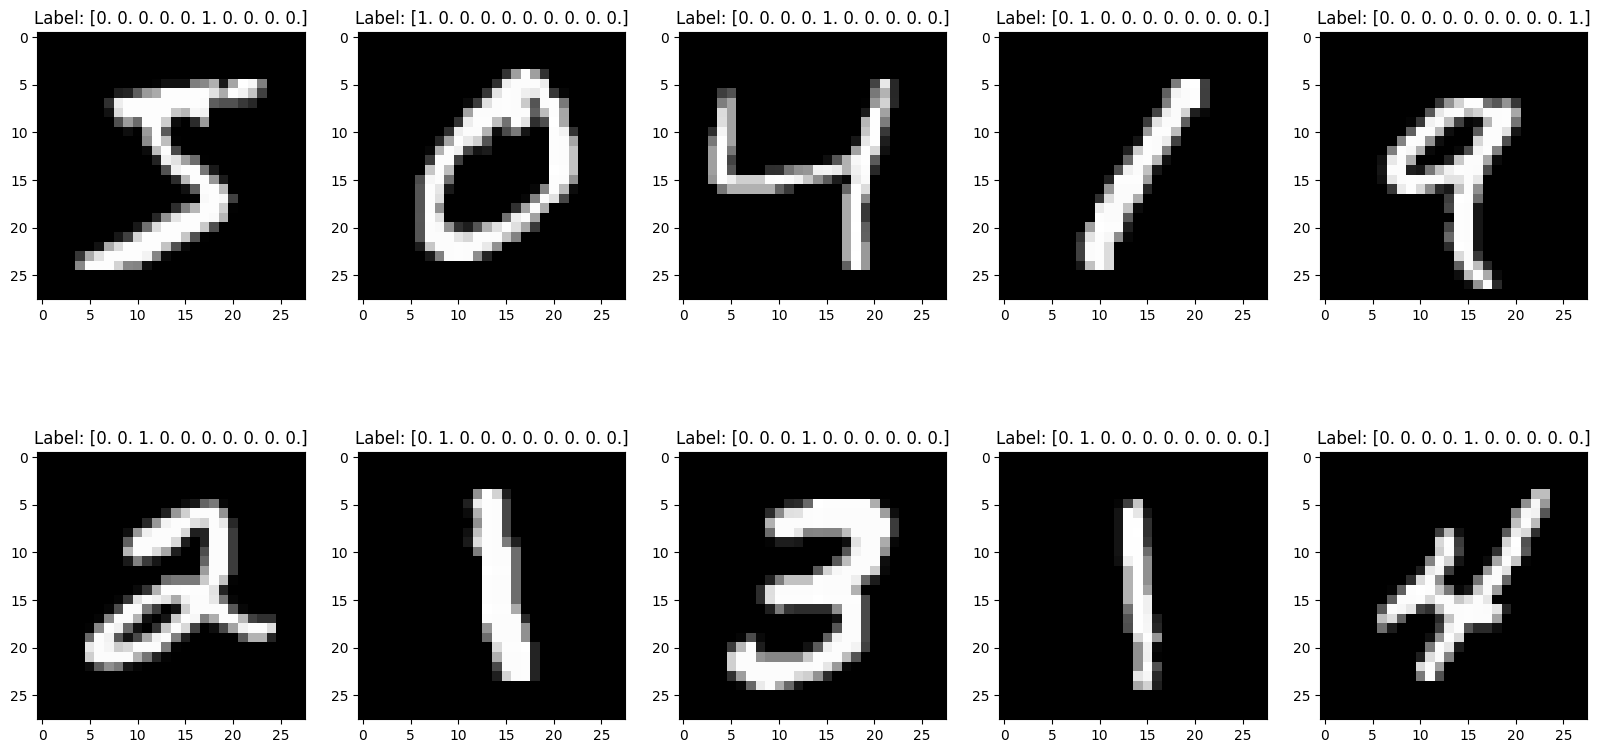

In [21]:
# Preview of the content of a batch

# Function to one-hot encode the labels
def one_hot_encode(labels):
	one_hot = np.zeros((len(labels), 10))
	for i, label in enumerate(labels):
		one_hot[i, label] = 1
	return one_hot

# load a batch of 10 images and plot them with their one hot encoded labels
x_batch, y_batch = load_batch(0, 10)
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
	axs[i//5, i%5].imshow(x_batch[i].detach().numpy(), cmap='gray')
	axs[i//5, i%5].set_title(f'Label: {one_hot_encode(y_batch)[i]}')

<BarContainer object of 10 artists>

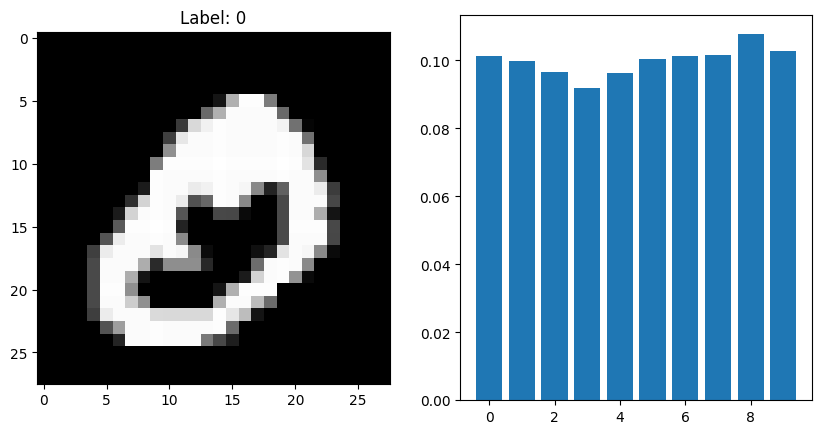

In [22]:
# Test an initial instance of the model i.e. without training
model = MNISTModel()
# Let's load another batch (just for fun !). This time it is the first 64 training images
x_batch, y_batch = load_batch(0, 64)
# Let's pass the batch through the model
probs = torch.exp(model.forward(x_batch))
# We select an example image in the batch to visualize the output probabilities it receives from the model
example_index = 63
fig, axs  = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(x_batch[example_index].detach().numpy(), cmap='gray')
axs[0].set_title(f'Label: {y_batch[example_index]}')
axs[1].bar(np.arange(10), probs[example_index].detach().numpy())

In [23]:
# We set the device to GPU if available, otherwise we use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
# Create the training loop
batch_size = 64
learning_rate = 1e-2
epochs = 3
model = MNISTModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.NLLLoss()

for i in range(epochs):
	epoch_avg_loss = 0
	for j in ( t:= tqdm(range(math.ceil(x_train.shape[0] // batch_size))) ):
		optimizer.zero_grad()
		x_batch, y_batch = load_batch(j* batch_size, batch_size)
		log_probs = model.forward(x_batch)
		loss = loss_fn(log_probs, y_batch)
		loss.backward()
		optimizer.step()
		epoch_avg_loss += loss.item()/(j+1)
		t.set_description(f'Epoch {i+1}/{epochs} | Batch Loss: {loss.item():.4f} | Avg Epoch Loss: {epoch_avg_loss:.4f}')

Epoch 1/3 | Batch Loss: 0.8302 | Avg Epoch Loss: 15.7777: 100%|██████████| 937/937 [00:04<00:00, 197.56it/s]
Epoch 2/3 | Batch Loss: 0.5762 | Avg Epoch Loss: 4.5395: 100%|██████████| 937/937 [00:04<00:00, 207.62it/s]
Epoch 3/3 | Batch Loss: 0.5202 | Avg Epoch Loss: 2.9571: 100%|██████████| 937/937 [00:04<00:00, 208.07it/s]


<BarContainer object of 10 artists>

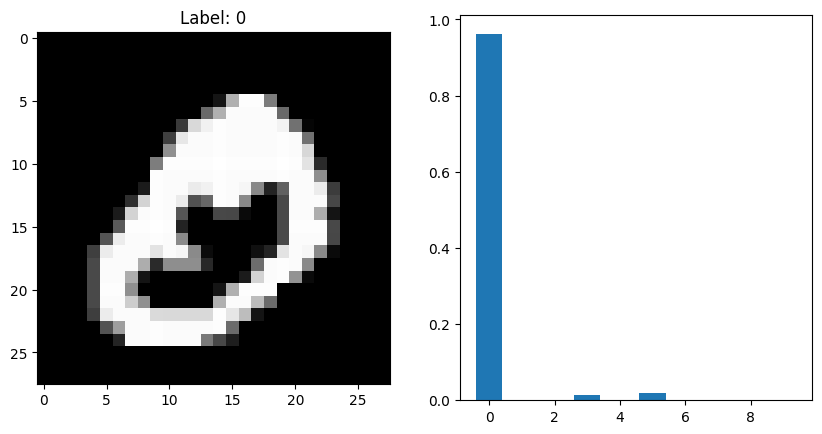

In [25]:
# Let's test the same example image again after training
x_batch, y_batch = load_batch(0, 64)
# We pass the batch through the model
probs = torch.exp(model.forward(x_batch))
# We select the same example image in the batch to visualize the output probabilities it receives from the model
example_index = 63
fig, axs  = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(x_batch[example_index].detach().numpy(), cmap='gray')
axs[0].set_title(f'Label: {y_batch[example_index]}')
axs[1].bar(np.arange(10), probs[example_index].detach().numpy())

In [26]:
# Saving the model for future use
torch.save(model.state_dict(), 'mnist_model.pth')

In [27]:
# Here is how you can load the model back
# Be aware that you need to define the model class before loading the model
model = MNISTModel()
model.load_state_dict(torch.load('mnist_model.pth'))

<All keys matched successfully>

In [28]:
# Let's test the model om the train set
x_train = torch.tensor(x_train, dtype=torch.float32)
x_train = x_train / 255.0
y_train = torch.tensor(y_train)
probs = torch.exp(model.forward(x_train))
preds = torch.argmax(probs, dim=1)
accuracy = (preds == y_train).float().mean()
print(f'Train Accuracy: {accuracy.item():.4f}')

Train Accuracy: 0.9006


In [29]:
# Let's evaluate the model on the test set
x_test = torch.tensor(x_test, dtype=torch.float32)
x_test = x_test / 255.0
y_test = torch.tensor(y_test)
probs = torch.exp(model.forward(x_test))
preds = torch.argmax(probs, dim=1)
accuracy = (preds == y_test).float().mean()
print(f'Test Accuracy: {accuracy.item():.4f}')

Test Accuracy: 0.9031
